# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('psyco.csv')

In [3]:
missing_counts = df.isnull().sum()

# Display the counts of missing values for each column
print(missing_counts)


age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64


In [4]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [6]:
#Finding the correlation

In [7]:
# Using the parametric analysis for finding the correlaiton

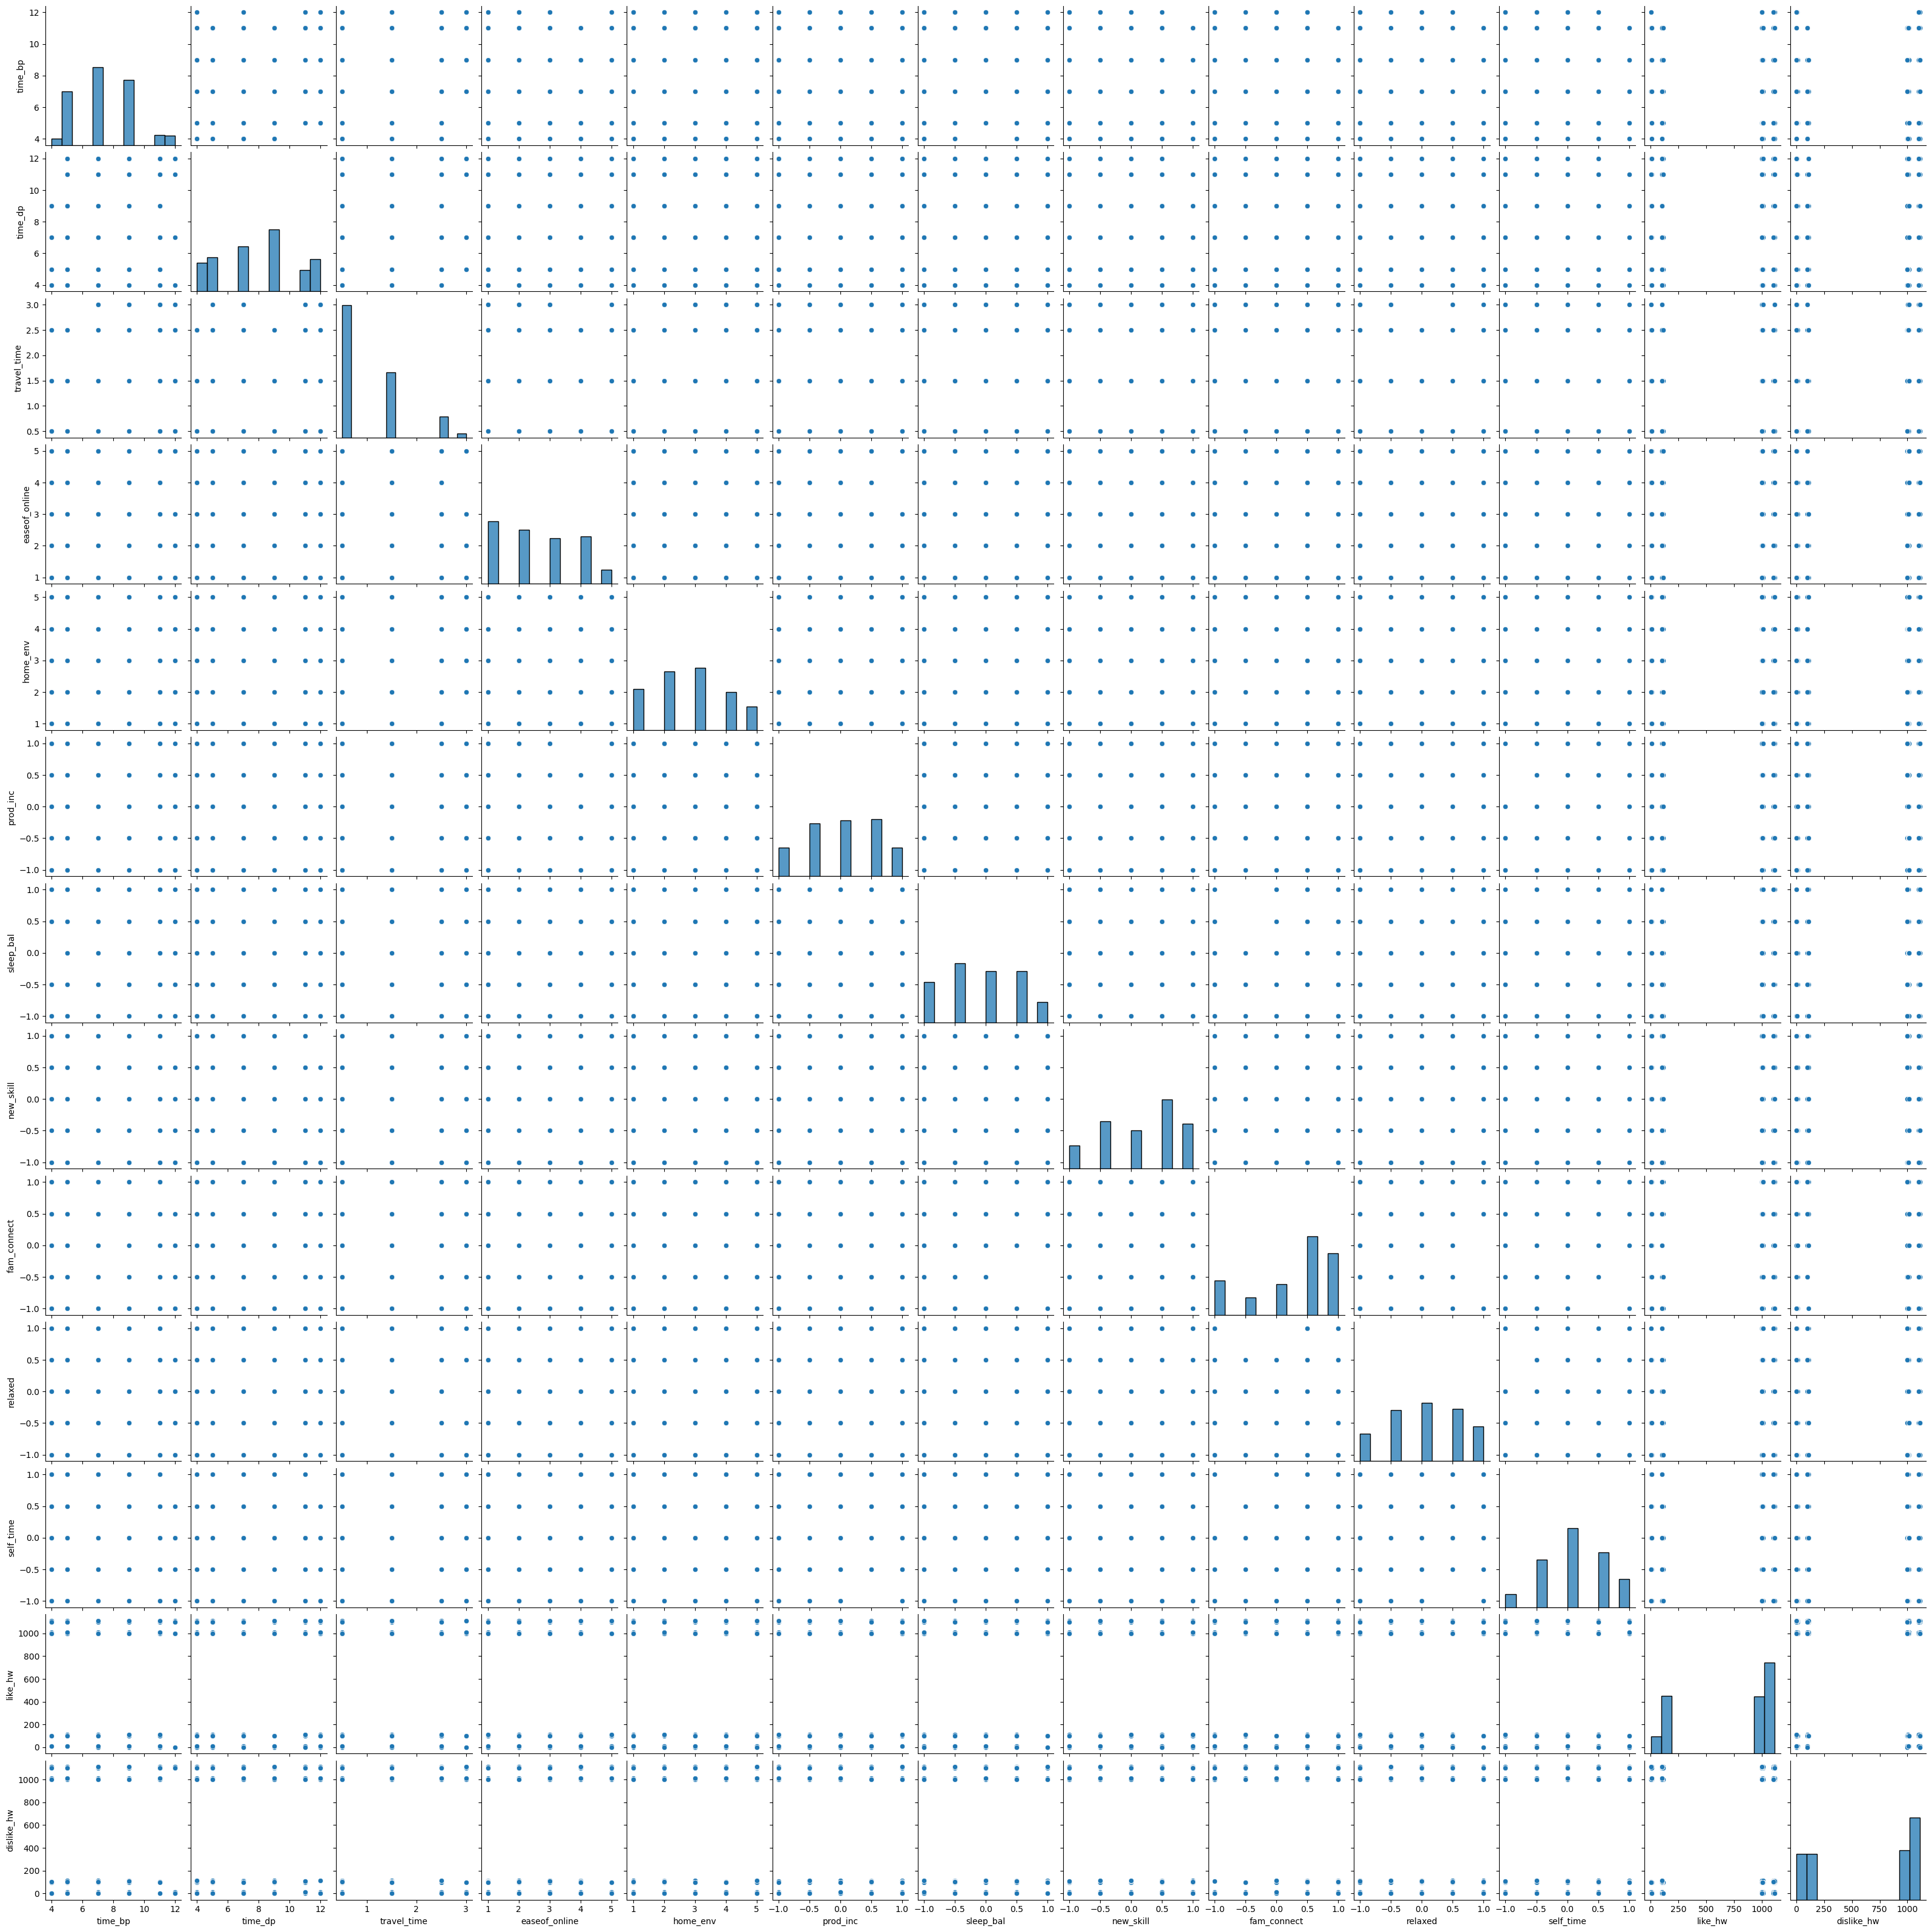

In [8]:
# Pairplot for finding the correlations, outliers among the features
sns.pairplot(data=df)

In [9]:
#Using pandas to calculate Pearson correlation coefficient
corr = df.corr(numeric_only=True)
corr

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
time_bp,1.000000,0.355643,0.299816,0.071906,0.006138,-0.071031,0.001819,-0.111612,-0.155279,-0.041309,0.029816,0.207231,0.185482
time_dp,0.355643,1.000000,0.118609,-0.080775,0.032382,0.295935,-0.241563,-0.262047,-0.357960,-0.271307,-0.348604,-0.069568,0.004119
travel_time,0.299816,0.118609,1.000000,0.146163,-0.002368,-0.145684,0.136077,0.061180,0.063957,0.048761,0.050292,0.149737,-0.061845
easeof_online,0.071906,-0.080775,0.146163,1.000000,0.510191,-0.641397,-0.054298,-0.238590,-0.143122,-0.261019,-0.212880,-0.196326,0.170586
home_env,0.006138,0.032382,-0.002368,0.510191,1.000000,-0.365763,-0.240437,-0.183406,-0.179852,-0.264093,-0.190767,-0.117974,0.303580
prod_inc,-0.071031,0.295935,-0.145684,-0.641397,-0.365763,1.000000,0.142434,0.308639,0.206196,0.285911,0.228605,0.099451,-0.092169
sleep_bal,0.001819,-0.241563,0.136077,-0.054298,-0.240437,0.142434,1.000000,0.556597,0.556660,0.625424,0.554918,0.142269,-0.193812
new_skill,-0.111612,-0.262047,0.061180,-0.238590,-0.183406,0.308639,0.556597,1.000000,0.713504,0.691247,0.690902,0.328849,-0.154541
fam_connect,-0.155279,-0.357960,0.063957,-0.143122,-0.179852,0.206196,0.556660,0.713504,1.000000,0.680937,0.706311,0.175436,-0.248830
relaxed,-0.041309,-0.271307,0.048761,-0.261019,-0.264093,0.285911,0.625424,0.691247,0.680937,1.000000,0.720567,0.323373,-0.276745


<Axes: >

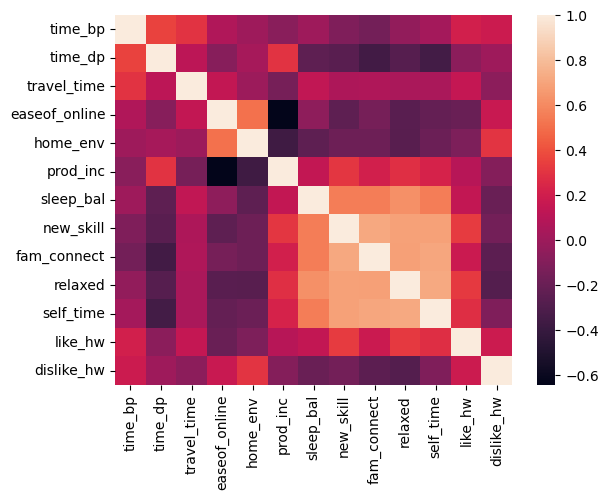

In [10]:
#Using Seaborn to visualize the Pearson correlation coefficient
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [11]:
#drop columns as missing values and travel_time is indepedent variable 
columns_to_drop = ['line_of_work',"like_hw", "dislike_hw"]
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
import numpy as np
from scipy import stats

# Assuming 'df' is your dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]

# Calculate Z-scores
z_scores = stats.zscore(numeric_data)

# Set a threshold for identifying outliers (e.g., 3 or -3)
threshold = 3

# Identify outliers using the Z-score
outliers = np.where(np.abs(z_scores) > threshold)

# Print the indices of outliers
print("Indices of outliers:", outliers)


Indices of outliers: (array([], dtype=int64), array([], dtype=int64))


In [13]:
import numpy as np

# Assuming 'df' is your dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]

# Calculate percentiles and IQR for numeric columns
Q1 = np.percentile(numeric_data, 25)
Q3 = np.percentile(numeric_data, 75)
IQR = Q3 - Q1

# Set a multiplier for identifying outliers (e.g., 1.5)
multiplier = 1.5

# Identify outliers using IQR for each numeric column
outliers = np.where((numeric_data < Q1 - multiplier * IQR) | (numeric_data > Q3 + multiplier * IQR))

# Print the indices of outliers for each numeric column
for col, col_outliers in zip(numeric_columns, outliers):
    print(f"Indices of outliers in column '{col}':", col_outliers)


Indices of outliers in column 'time_bp': [   1    7    8 ... 1172 1173 1173]
Indices of outliers in column 'time_dp': [1 1 1 ... 1 0 1]


In [14]:
#Finding any outliers in  the categorical variables:
df_cat=df[['age', 'gender', 'occupation','time_bp', 'time_dp','travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal','new_skill', 'fam_connect', 'relaxed', 'self_time', 'prefer', 'certaindays_hw']]
for i in df_cat.columns:
    print(df_cat[i].unique())

['19-25' 'Dec-18' '33-40' '60+' '26-32' '40-50' '50-60']
['Male' 'Female' 'Prefer not to say']
['Student in College' 'Student in School' 'Working Professional'
 'Entrepreneur' 'Retired/Senior Citizen' 'Homemaker'
 'Currently Out of Work'
 'Medical Professional aiding efforts against COVID-19']
[ 7  5  9 11  4 12]
[ 5 11  7  4  9 12]
[0.5 1.5 2.5 3. ]
[3 4 2 1 5]
[3 2 1 4 5]
[ 0.  -0.5  1.  -1.   0.5]
[ 0.   0.5  1.  -1.  -0.5]
[ 0.5 -1.   0.   1.  -0.5]
[ 1.   0.5  0.  -0.5 -1. ]
[-0.5  1.   0.5 -1.   0. ]
[-0.5  1.   0.5  0.  -1. ]
['Complete Physical Attendance' 'Work/study from home']
['Yes' 'No' 'Maybe']


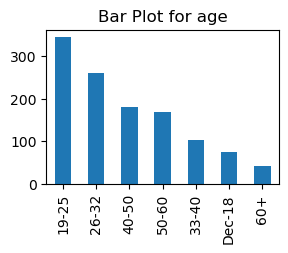

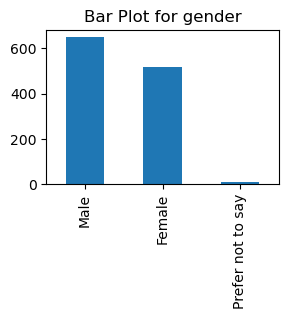

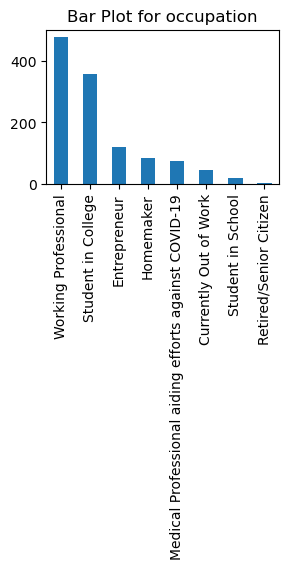

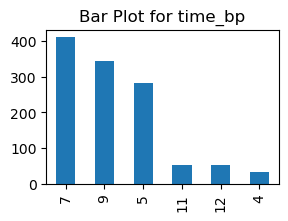

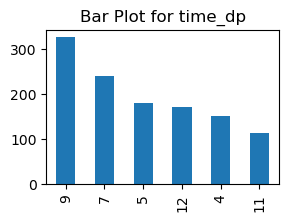

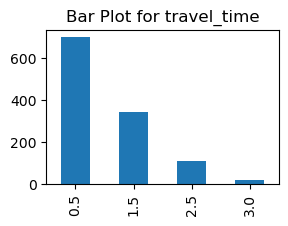

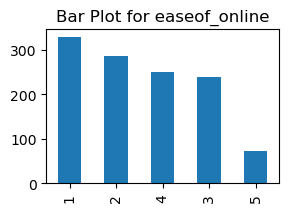

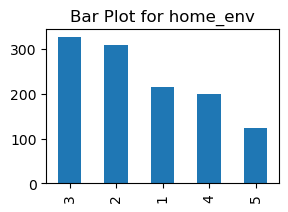

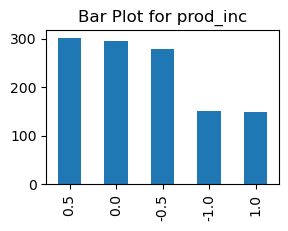

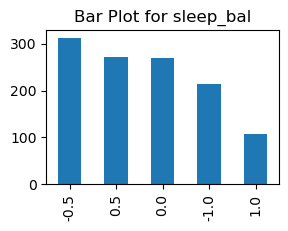

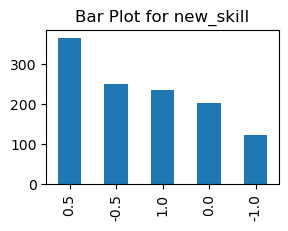

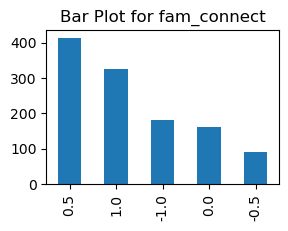

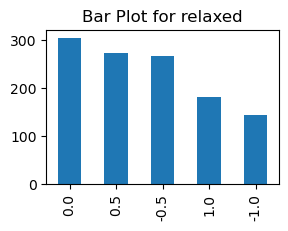

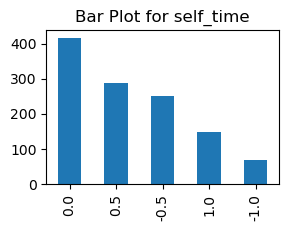

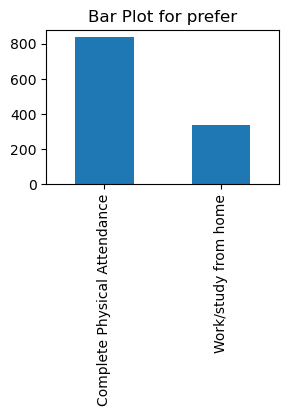

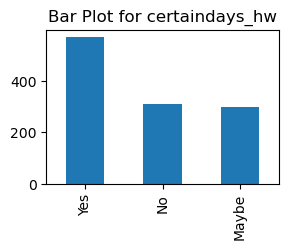

In [15]:
for column in df.columns:
    plt.figure(figsize=(3, 2))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {column}')
    plt.show(block=False)

In [16]:
#Replacing numerical values with categorical values
age_grp= {
   'Dec-18': 0,
   '19-25' : 1, 
   '26-32' : 2,
   '33-40' : 3,
   '40-50' : 4, 
   '50-60' : 5, 
   '60+'  : 6
}
df['Age Group'] = df['age'].replace(age_grp,inplace=True)

gender_grp = {
   'Male': 0,
   'Female' : 1,
   'Prefer not to say' : 2
}
df['Gender Group'] =df['gender'].replace(gender_grp,inplace=True)

occupation_grp = {
    'Working Professional' : 0,
    'Student in College' : 1,
    'Entrepreneur' : 2,
    'Homemaker' : 3,
    'Medical Professional aiding efforts against COVID-19' : 4,
    'Currently Out of Work' : 5 , 
    'Student in School' : 6,
    'Retired/Senior Citizen' : 7
}
df['Occupation Group'] = df['occupation'].replace(occupation_grp,inplace=True)


prefer_grp = {
    'Complete Physical Attendance' : 0,
    'Work/study from home' : 1

}
df['Prefer Group'] = df['prefer'].replace(prefer_grp,inplace=True)

certaindays_hw_grp = {
    'Yes' : 0,
    'No' : 1,
    'Maybe' : 2
}
df['Certain days Group'] = df['certaindays_hw'].replace(certaindays_hw_grp,inplace=True)


In [17]:
#drop columns
columns_to_drop = ['Age Group', 'Gender Group', 'Occupation Group', 'Prefer Group', 'Certain days Group']
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Define categorical columns
categorical_columns = ["prod_inc", "sleep_bal", "new_skill", "fam_connect", "relaxed", "self_time", 
                     ]

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply label encoding to each categorical column
df[categorical_columns] = df[categorical_columns].apply(lambda col: LE.fit_transform(col))

In [19]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,1,0,1,7,5,0.5,3,3,2,2,3,4,1,1,0,0
1,0,0,6,7,11,0.5,4,2,1,3,0,4,4,4,0,1
2,1,0,1,7,7,1.5,2,2,4,2,3,3,3,3,0,0
3,1,0,1,7,7,1.5,3,1,2,4,3,2,0,1,0,0
4,1,1,1,7,7,1.5,2,2,2,2,2,2,3,2,0,0
